In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [2]:
df= gpd.read_file(r'data/LocalRoadsinColorado.geojson')

In [3]:
df.head()

,govlevel,adminclass,shape_stle,jursplit,fipscounty,seg_length,population,segmdir,thrulnqty,runlength1,...,from_descr,forestrout,fund_id,route,routename,hpmsid,countstati,funcclassi,lrsroute,geometry
0,2,2 Local Service,266.859937657,0,Adams,0.17,4,NE,2,0.17,...,ELMWOOD LN,None,LOCAL,20234,CYD DR,None,None,7 Local,001-0-2013-4391,"MULTILINESTRING ((-105.00813 39.83887, -105.00..."
1,2,4 Proposed Local Jurisdiction,166.845836848,0,El Paso,0.1,1,E,2,0.34,...,None,None,NONQUAL,4511,LAMPREY DR,None,None,7 Local,041-9-2019-0151,"MULTILINESTRING ((-104.62265 38.74254, -104.62..."
2,2,2 Local Service,270.027136324,0,Adams,0.16,4,N,2,0.16,...,BGN,None,LOCAL,20500,YORK ST,None,None,7 Local,001-0-2013-5569,"MULTILINESTRING ((-104.95839 39.84886, -104.95..."
3,2,2 Local Service,571.903555609,0,Adams,0.35,4,NE,2,0.35,...,ZUNI ST,None,LOCAL,8390,STACY DR,None,None,7 Local,001-0-2013-3099,"MULTILINESTRING ((-105.01539 39.84650, -105.01..."
4,2,2 Local Service,248.306464369,0,Adams,0.19,1,N,2,0.19,...,CUL DE SAC,None,LOCAL,22705,AVERY WY,None,None,7 Local,001-0-2013-2523,"MULTILINESTRING ((-104.54482 39.95741, -104.54..."


In [4]:
decades = range(1900,2030,10)
df['date'] = pd.to_datetime(df['builtyr'], format='%Y').dt.year
for year in decades:
    df.loc[((df.date >= year)&(df.date<year+10)), 'decade'] = year
df['decade'].dropna(inplace=True)

In [5]:
customCmap = LinearSegmentedColormap.from_list("mycmap", ["#bf0a30", "#ffd700", "#ffffff"])

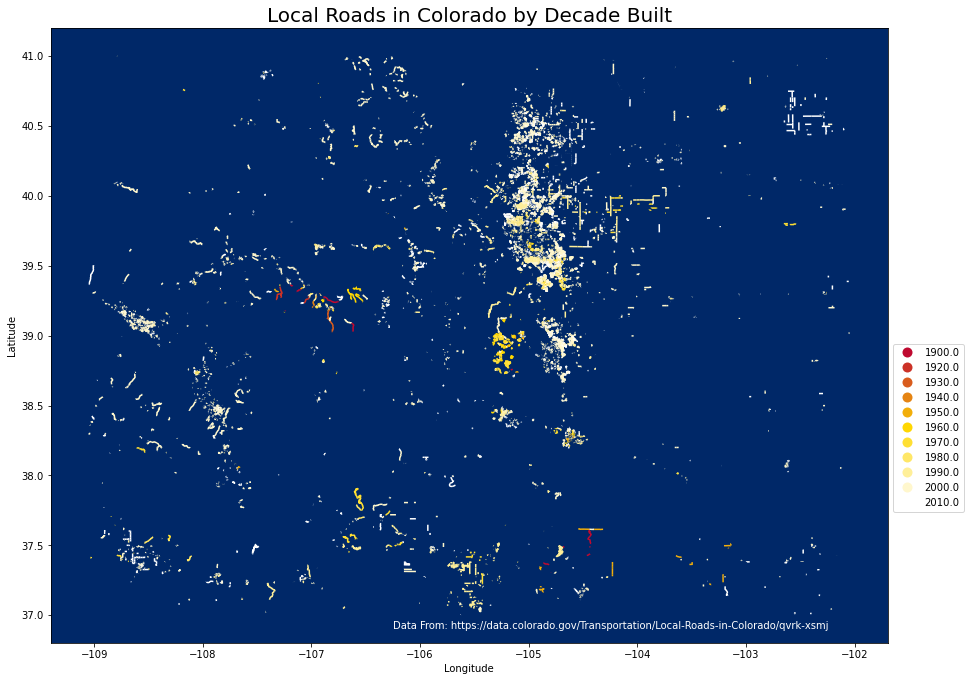

In [6]:
ax = df.plot(column=df.decade,figsize=(15,15), cmap=customCmap, legend=True, categorical=True, legend_kwds={'loc': 'center left', 'bbox_to_anchor':(1,0.35)})
ax.patch.set_facecolor("#002868")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Local Roads in Colorado by Decade Built', fontsize=20)
plt.text(-106.25, 36.9, r'Data From: https://data.colorado.gov/Transportation/Local-Roads-in-Colorado/qvrk-xsmj', {'color': 'w', 'fontsize': 10})
plt.savefig('Day_2.png')